# (Pseudo-) Online Feature Calculation

This notebook is used to receive data from the HoloLens 2. The data is chunked in 10 second pieces.

In [1]:
from flask import Flask, request
import json
import requests
import os
import pandas as pd

## Read the data from the newly arrived csv-file and call the feature calculation

### Run FeaturesCalculation notebook to make its function accessible here

In [2]:
%run -i FeatureCalculation.ipynb

## Calculate the features and save them as csv
See `FeaturesCalculation.ipynb`for more details.

In [3]:
def calculate_features_for_10s_chunk(newdf):
    list_of_features = []
    newdf_valid = only_valid_data(newdf)
    if (len(newdf_valid) > 1):
        df_fixations = get_fixation_df(newdf_valid)
        features = calculate_fixation_features(df_fixations, 10)
        blinks = calculate_blink_features(newdf,10)
        directions = calculate_directions_of_list(df_fixations) 
        density = calculate_fixation_density(newdf_valid, df_fixations)
        features.update(blinks)
        features.update(directions)
        features.update(density)
        features["label"] = ""
        features["duration"] = "10"
        features["participant_id"] = "002"            
        list_of_features.append(features)  
        flat_ls = [item for sublist in list_of_features for item in sublist]
        feature_file_path = save_as_csv(list_of_features, "001", './OnlineFeatureFiles/')
        return feature_file_path

In [4]:
def csv_to_features(gaze_data_file_path):
    # continue only if the csv-file contains data
    if os.stat(gaze_data_file_path).st_size != 0:
        df = pd.read_csv(gaze_data_file_path)
        feature_file_path = calculate_features_for_10s_chunk(df)
        print(f"Feature calculation done for: {gaze_data_file_path}")
        print(f"Feature file path: {feature_file_path}")
        return feature_file_path
# csv_to_features("./HL2_DataCollection/2022_09_23-13_41_19-Alex01-Inspection02.csv")

## Run SVM notebook to make its function accessible here
If you are not training on normalized data this make take a while.

Columns of the CSV file are 19 features, label of the activity, duration or the timespan of the activity, and the ID of the participant:
Features:


,meanFix,maxFix,varFix,xDir,yDir,fixDensPerBB
0,250.882353,666,16554.228164,0.484848,0.606061,369.479986
1,246.742857,900,23549.020168,0.529412,0.529412,363.711018
2,237.257143,1067,36627.431933,0.441176,0.558824,266.246748
3,293.137931,767,35208.551724,0.500000,0.500000,319.553727
4,199.125000,566,12614.163462,0.589744,0.487179,305.832090
5,262.562500,867,36411.415323,0.516129,0.580645,236.757891
6,204.175000,733,16987.430128,0.538462,0.512821,445.453567
7,221.540541,733,19568.977477,0.583333,0.500000,538.273012
8,430.095238,2567,322794.690476,0.800000,0.450000,77.460002
9,227.805556,533,8651.246825,0.914286,0.457143,132.320562


Labels:


0    Inspection
1    Inspection
2    Inspection
3    Inspection
4    Inspection
5    Inspection
6    Inspection
7    Inspection
8       Reading
9       Reading
Name: label, dtype: object

Normalized Features:


,meanFix,maxFix,varFix,xDir,yDir,fixDensPerBB
0,0.412048,0.144783,0.013814,0.527009,0.743802,0.238355
1,0.405249,0.195652,0.019651,0.575448,0.649733,0.234633
2,0.389670,0.231957,0.030564,0.479540,0.685829,0.171758
3,0.481448,0.166739,0.029380,0.543478,0.613636,0.206147
4,0.327042,0.123043,0.010526,0.641026,0.597902,0.197295
5,0.431232,0.188478,0.030384,0.561010,0.712610,0.152735
6,0.335336,0.159348,0.014175,0.585284,0.629371,0.287366
7,0.363857,0.159348,0.016330,0.634058,0.613636,0.347245
8,0.706387,0.558043,0.269361,0.869565,0.552273,0.049970
9,0.374147,0.115870,0.007219,0.993789,0.561039,0.085361


Empty DataFrame
Columns: [meanFix, minFix, maxFix, varFix, stdFix, meanDis, minDis, maxDis, varDis, stdDisp, freqDisPerSec, number_of_blinks, blinkMean, blinkMin, blinkMax, blinkRate, xDir, yDir, fixDensPerBB, label, duration, participant_id]
Index: []

[0 rows x 22 columns]
Accuracy Linear Kernel: 0.9333333333333333
Accuracy Polynomial Kernel: 0.9333333333333333
Accuracy Radial Basis Kernel: 0.9333333333333333
Accuracy Sigmoid Kernel: 0.3
CM Linear:
[[ 9  0  1]
 [ 0 10  0]
 [ 1  0  9]]
CM Polynomial:
[[10  0  0]
 [ 1  9  0]
 [ 1  0  9]]
CM Radial:
[[10  0  0]
 [ 1  9  0]
 [ 1  0  9]]
CM Sigmoid:
[[ 0 10  0]
 [ 0  9  1]
 [ 0 10  0]]


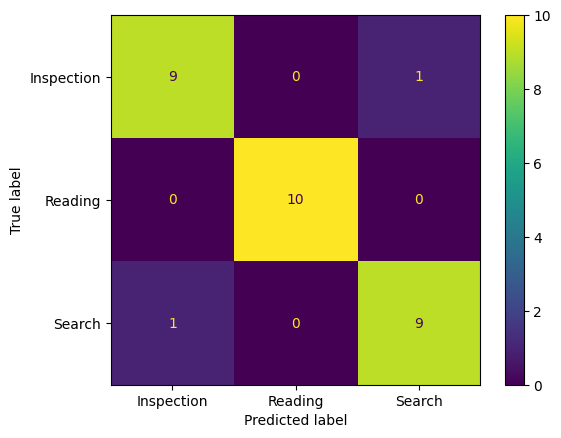

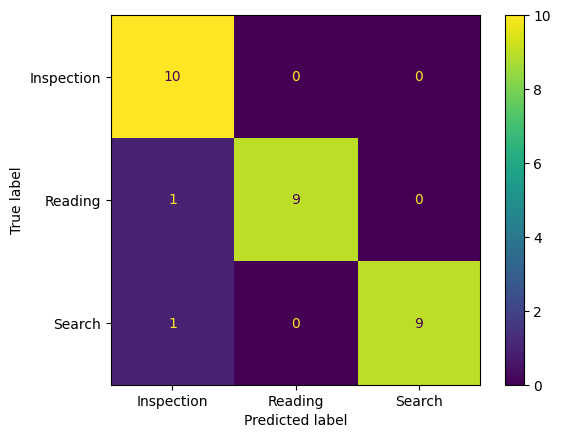

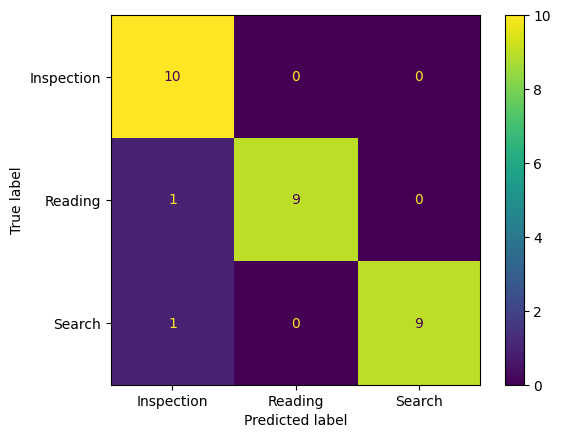

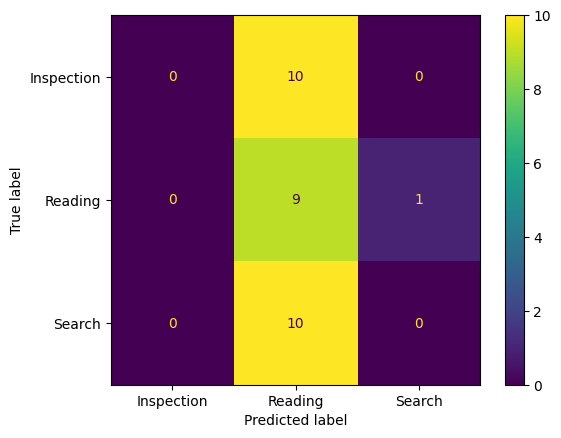

New Feature:


c:\Users\Jannis\anaconda3\envs\UbicompA02\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


,meanFix,maxFix,varFix,xDir,yDir,fixDensPerBB
0,0.412048,0.144783,0.013814,0.527009,0.743802,0.238355
23,0.502233,0.246304,0.053017,0.582298,0.613636,0.202995


New Linear Prediction:


array([[0.74009343, 0.01039155, 0.24951502],
       [0.79485867, 0.04945698, 0.15568435]])

array(['Inspection', 'Inspection'], dtype=object)

New Poly Prediction:


array([[0.8272886 , 0.01119897, 0.16151243],
       [0.83165357, 0.03717697, 0.13116946]])

array(['Inspection', 'Inspection'], dtype=object)

New RBF Prediction:


array([[0.78576471, 0.00678393, 0.20745135],
       [0.79279598, 0.03919221, 0.16801181]])

array(['Inspection', 'Inspection'], dtype=object)

New Sig Prediction:


array([[0.3404172 , 0.25607296, 0.40350984],
       [0.33664834, 0.24039534, 0.42295633]])

array(['Reading', 'Reading'], dtype=object)

In [5]:
%run -i AnSVMClassifierForHL2GazeFeatures.ipynb

## Predict the class for the last arrived data chunk

In [6]:
def normalize_values(df): 
    scaler = MaxAbsScaler()
    training_features_plus_new_row = pd.concat([features, df])  # features -> contains all the features for training and testing
    scaler.fit(training_features_plus_new_row)
    scaled = scaler.transform(training_features_plus_new_row)
    scaled_features = pd.DataFrame(scaled, columns=df.columns)
    row_for_last_chunk = scaled_features.tail(1)
    print("Normalized Features:")
    display(row_for_last_chunk)
    return row_for_last_chunk

In [7]:
row_counter = 0
classes = ["Inspection", "Reading", "Search"]
kernels = [linear, poly, rbf, sig]
def predict_class_for_last_chunk(feature_file_path):
    if os.stat(feature_file_path).st_size != 0:
        df = pd.read_csv(feature_file_path)
        cur_number_of_rows = df.shape[0]
        # only continue if we have a new row
        if cur_number_of_rows > row_counter:
            last_row = df.tail(1)
            display(last_row)
            
            lr_features= last_row[["meanFix", "maxFix", "varFix", "xDir", "yDir", "fixDensPerBB"]]
            last_row = normalize_values(lr_features)
            
            classes = linear.classes_
            # print(f"\n---\nclasses: {classes}")
            
            results = {}
            
            for kernel in kernels:
                new_pred_prob = kernel.predict_proba(last_row)
                new_pred_class = kernel.predict(last_row)
                # print("\n---\nNew Prediction:")
                display(new_pred_prob)
                display(new_pred_class)
                pred_list = new_pred_prob.tolist()[0]
                max_prob = max(pred_list)
                # print(f"max_prob: {max_prob}")
                max_index = pred_list.index(max_prob)
                # print(f"max_index: {max_prob}")
                results[kernel.kernel] = {"pred_class": new_pred_class[0], "max_prob": max_prob, "max_index": max_index }
                # results[kernel.kernel] = [new_pred_class[0], max_prob, max_index ]
                
            display(results)
        
            
            max_proba = {max(float(d['max_prob']) for d in results.values())}
            key = [i for i in results if results[i]['max_prob']==max_proba]
            # print(f"max_proba: {max_proba}, key: {key}")
            predicts = [d['pred_class'] for d in results.values()]
            final_class_from_predict = max(set(predicts), key = predicts.count)
            # print(f"final_class_from_predict: {final_class_from_predict}")
            
            
            new_linear_pred_prob = linear.predict_proba(last_row)
            new_linear_pred_class = linear.predict(last_row)
            # print("\n---\nNew Linear Prediction:")
            # display(new_linear_pred_prob)
            # display(new_linear_pred_class)
            lin_list = new_linear_pred_prob.tolist()[0]
            lin_max_prob = max(lin_list)
            # print(f"lin_max_prob: {lin_max_prob}")
            lin_max_index = lin_list.index(lin_max_prob)
            # print(f"lin_max_index: {lin_max_index}")

            new_poly_pred_prob = poly.predict_proba(last_row)
            new_poly_pred_class = poly.predict(last_row)
            # print("\n---\nNew Poly Prediction:")
            # display(new_poly_pred_prob)
            # display(new_poly_pred_class)
            poly_list = new_poly_pred_prob.tolist()[0]
            poly_max_prob = max(poly_list)
            # print(f"poly_max_prob: {poly_max_prob}")
            poly_max_index = poly_list.index(poly_max_prob)
            # print(f"poly_max_index: {poly_max_index}")

            new_rbf_pred_prob = rbf.predict_proba(last_row)
            new_rbf_pred_class = rbf.predict(last_row)
            # print("\n---\nNew RBF Prediction:")
            # display(new_rbf_pred_prob)
            # display(new_rbf_pred_class)
            rbf_list = new_rbf_pred_prob.tolist()[0]
            rbf_max_prob = max(rbf_list)
            # print(f"rbf_max_prob: {rbf_max_prob}")
            rbf_max_index = rbf_list.index(rbf_max_prob)
            # print(f"rbf_max_index: {rbf_max_index}")
            

            new_sig_pred_prob = sig.predict_proba(last_row)
            new_sig_pred_class = sig.predict(last_row)
            # print("\n---\nNew Sig Prediction:")
            # display(new_sig_pred_prob)
            # display(new_sig_pred_class)
            sig_list = new_sig_pred_prob.tolist()[0]
            sig_max_prob = max(sig_list)
            # print(f"sig_max_prob: {sig_max_prob}")
            sig_max_index = sig_list.index(sig_max_prob)
            # print(f"sig_max_index: {sig_max_index}")
            
            print("----------------")
            max_probs = { lin_max_prob: lin_max_index, poly_max_prob: poly_max_index,
                        rbf_max_prob: rbf_max_index}
            
            max_prediction_value = max(max_probs, key=float)
            # print(max_prediction_value)
            final_max_index = max_probs[max_prediction_value]
            final_class_from_probs = classes[final_max_index]
            
            # print(f"final_class_from_probs: {final_class_from_probs}")
            
            predicts = [new_linear_pred_class[0], new_poly_pred_class[0], new_rbf_pred_class[0]]
            final_class_from_predict = max(set(predicts), key = predicts.count)
            # print(f"final_class_from_predict: {final_class_from_predict}")
            
            
            same_class_predicted = (final_class_from_probs == final_class_from_predict)
            # print(f"same_class_predicted: {same_class_predicted}")
            
            if (same_class_predicted and max_prediction_value > 0.5):
                # send request to HL2 with class and probability
                send_activity(final_class_from_probs, max_prediction_value)
            
# predict_class_for_last_chunk("FeatureFiles/feature_list_P09.csv")

## Send the recognized activity back to the HoloLens 2 

Make sure to set the correct IP address for the HL2 in line 10!

In [8]:
import urllib.parse
import requests
import random
import time

# Remember to change the IP address and port if needed!
holo_url = "http://10.2.2.158:49898"
# holo_url = "http://130.82.249.71:50548"

def send_activity(activity, probability):

    # holo_url = "http://10.2.2.172:63394"
    
    # holo_url = "http://10.2.2.150:53625"
    # holo_url = "http://localhost:5000"
    # holo_url = "http://130.82.26.8:5000"

    url = "{}/?activity={}&probability={}".format(str(holo_url), str(activity), str(probability))
    print(url)

    try:
        r = requests.get(url, timeout=120)
        print(r)
        if r.status_code == 200:
            print("Notified Hololens about activity {}".format(activity))
        else:
            print("Request {} failed with status code {}".format(url, r.status_code))
    except requests.ConnectionError as e:
        print("OOPS!! Connection Error. Make sure you are connected to Internet. Technical Details given below.\n")
        print(str(e))
    except requests.Timeout as e:
        print("OOPS!! Timeout Error")
        print(str(e))
    except requests.RequestException as e:
        print("OOPS!! General Error")
        print(str(e))

    else:
        return

def create_and_send_test_data():
    activities = ["reading", "writing", "searching", "inspecting"]
    a = random.randint(0, 3)
    activity = activities[a]
    confidence = random.uniform(0, 1)
    print(f"{activity}: {confidence}")
    send_activity(activity, confidence)


def sender():
    start_time = time.time()
    interval = 5
    for i in range(20):
        time.sleep(start_time + i * interval - time.time())
        create_and_send_test_data()
        print("sent data")

def send_this_desktop_ip_to_holo(desktop_ip, port):

    # holo_url = "http://10.2.2.172:52434"
    # holo_url = "http://10.2.2.150:53625"
    # holo_url = "http://localhost:5000"
    # holo_url = "http://130.82.26.8:5000"
    
    desktop_ip = urllib.parse.quote(desktop_ip)

    url = "{}/?desktopip={}&port={}".format(str(holo_url), str(desktop_ip), str(port))
    print(url)

    try:
        r = requests.get(url, timeout=60)
        print(r)
        if r.status_code == 200:
            print("Notified Hololens about IP address {}".format(desktop_ip))
        else:
            print("Request {} failed with status code {}".format(url, r.status_code))
    except requests.ConnectionError as e:
        print("OOPS!! Connection Error. Make sure you are connected to Internet. Technical Details given below.\n")
        print(str(e))
    except requests.Timeout as e:
        print("OOPS!! Timeout Error")
        print(str(e))
    except requests.RequestException as e:
        print("OOPS!! General Error")
        print(str(e))

    else:
        return
    
    
# if __name__ == '__main__':
    # sender()


## Send this desktop's IP address to the HL2
This enables the HL2 to send the gaze data correctly to the computer where this script is running.
Make sure to enter your computer's IP-address and a free port.

In [9]:
ipaddress = "10.2.2.152"
# ipaddress = "130.82.27.178"
port = "5555"
send_this_desktop_ip_to_holo(ipaddress, port)

http://10.2.2.158:49898/?desktopip=10.2.2.152&port=5555
<Response [200]>
Notified Hololens about IP address 10.2.2.152


## Run a simple Flask server that receives the raw gaze data from the HL2
Make sure to enter your computer's IP-address and a suitable port in the last line. \
Note: `0.0.0.0` as IP address lets the server listen on all its IP addresses, usually 127.0.0.1 and the public IP address.

In [10]:
from flask_executor import Executor

import logging
logger = logging.getLogger('waitress')
logger.setLevel(logging.DEBUG)

app = Flask(__name__)
executor = Executor(app)

@app.route('/', methods=['POST', 'PUT'])
def result():
    new_csv = request.files["gazedata"].read()
    filename = request.form["filename"]
    print(f"filename: {filename}")
    filepath = os.path.join("./OnlineGazeDataChunks/", filename)
    print(f"filepath: {filepath}")
    outF = open(filepath, "wb")
    outF.write(new_csv)
    executor.submit(start_feature_calculation,filepath)
    return 'Received !'  

# '''
def start_feature_calculation(filepath):
    print("start fc for: ", filepath)
    if os.stat(filepath).st_size != 0:
       feature_file_path = csv_to_features(filepath)
       if os.stat(feature_file_path).st_size != 0:
           predict_class_for_last_chunk(feature_file_path)
# '''

if __name__ == '__main__':
    from waitress import serve
    serve(app, listen="0.0.0.0:5555")


INFO:waitress:Serving on http://0.0.0.0:5555


filename: chunk_2023-10-27_03-16-01_000.csv
filepath: ./OnlineGazeDataChunks/chunk_2023-10-27_03-16-01_000.csv
start fc for:  ./OnlineGazeDataChunks/chunk_2023-10-27_03-16-01_000.csv
filename: chunk_2023-10-27_03-16-12_001.csv
filepath: ./OnlineGazeDataChunks/chunk_2023-10-27_03-16-12_001.csv
start fc for:  ./OnlineGazeDataChunks/chunk_2023-10-27_03-16-12_001.csv
Feature calculation done for: ./OnlineGazeDataChunks/chunk_2023-10-27_03-16-12_001.csv
Feature file path: ./OnlineFeatureFiles/feature_list_P001.csv


,meanFix,minFix,maxFix,varFix,stdFix,meanDis,minDis,maxDis,varDis,stdDisp,...,blinkMean,blinkMin,blinkMax,blinkRate,xDir,yDir,fixDensPerBB,label,duration,participant_id
9,196.333333,100,934,27769.076923,166.640562,0.058952,0.028381,0.196147,0.00209,0.045718,...,756.62963,33,4333,2.7,0.692308,0.653846,41.462342,NaN,10,2


Normalized Features:


,meanFix,maxFix,varFix,xDir,yDir,fixDensPerBB
149,0.322457,0.203043,0.023172,0.752508,0.802448,0.026748


array([[0.04576804, 0.52721034, 0.42702162]])

array(['Reading'], dtype=object)

array([[0.03269234, 0.30077694, 0.66653071]])

array(['Search'], dtype=object)

array([[0.04126453, 0.48345748, 0.47527799]])

array(['Reading'], dtype=object)

array([[0.38491331, 0.29828375, 0.31680294]])

array(['Reading'], dtype=object)

{'linear': {'pred_class': 'Reading',
  'max_prob': 0.5272103424411656,
  'max_index': 1},
 'poly': {'pred_class': 'Search',
  'max_prob': 0.6665307137480334,
  'max_index': 2},
 'rbf': {'pred_class': 'Reading',
  'max_prob': 0.4834574795625238,
  'max_index': 1},
 'sigmoid': {'pred_class': 'Reading',
  'max_prob': 0.38491331154313324,
  'max_index': 0}}

----------------
filename: chunk_2023-10-27_03-16-22_002.csv
filepath: ./OnlineGazeDataChunks/chunk_2023-10-27_03-16-22_002.csv
start fc for:  ./OnlineGazeDataChunks/chunk_2023-10-27_03-16-22_002.csv
Feature calculation done for: ./OnlineGazeDataChunks/chunk_2023-10-27_03-16-22_002.csv
Feature file path: ./OnlineFeatureFiles/feature_list_P001.csv


,meanFix,minFix,maxFix,varFix,stdFix,meanDis,minDis,maxDis,varDis,stdDisp,...,blinkMean,blinkMin,blinkMax,blinkRate,xDir,yDir,fixDensPerBB,label,duration,participant_id
10,147.8125,100,266,2418.157258,49.174762,0.101225,0.028104,0.335614,0.008393,0.091616,...,810.25641,167,1000,3.9,0.516129,0.645161,85.856989,NaN,10,2


Normalized Features:


,meanFix,maxFix,varFix,xDir,yDir,fixDensPerBB
149,0.242767,0.057826,0.002018,0.56101,0.791789,0.055387


array([[0.04940149, 0.00874429, 0.94185422]])

array(['Search'], dtype=object)

array([[0.06169362, 0.00975544, 0.92855094]])

array(['Search'], dtype=object)

array([[0.06454785, 0.00808936, 0.92736279]])

array(['Search'], dtype=object)

array([[0.38445272, 0.22512452, 0.39042276]])

array(['Reading'], dtype=object)

{'linear': {'pred_class': 'Search',
  'max_prob': 0.9418542170976957,
  'max_index': 2},
 'poly': {'pred_class': 'Search',
  'max_prob': 0.9285509379726965,
  'max_index': 2},
 'rbf': {'pred_class': 'Search',
  'max_prob': 0.9273627852924101,
  'max_index': 2},
 'sigmoid': {'pred_class': 'Reading',
  'max_prob': 0.390422758465163,
  'max_index': 2}}

----------------
http://10.2.2.158:49898/?activity=Search&probability=0.9418542170976957
<Response [200]>
Notified Hololens about activity Search
filename: chunk_2023-10-27_03-16-32_003.csv
filepath: ./OnlineGazeDataChunks/chunk_2023-10-27_03-16-32_003.csv
start fc for:  ./OnlineGazeDataChunks/chunk_2023-10-27_03-16-32_003.csv
Feature calculation done for: ./OnlineGazeDataChunks/chunk_2023-10-27_03-16-32_003.csv
Feature file path: ./OnlineFeatureFiles/feature_list_P001.csv


,meanFix,minFix,maxFix,varFix,stdFix,meanDis,minDis,maxDis,varDis,stdDisp,...,blinkMean,blinkMin,blinkMax,blinkRate,xDir,yDir,fixDensPerBB,label,duration,participant_id
11,418.333333,100,1900,352877.5,594.034932,0.092611,0.031285,0.362029,0.011015,0.104951,...,565.241379,33,4800,2.9,0.625,0.375,19.49871,NaN,10,2


Normalized Features:


,meanFix,maxFix,varFix,xDir,yDir,fixDensPerBB
149,0.687069,0.413043,0.294464,0.679348,0.460227,0.012579


array([[0.27068289, 0.69371202, 0.03560509]])

array(['Reading'], dtype=object)

array([[0.32477097, 0.6494743 , 0.02575473]])

array(['Reading'], dtype=object)

array([[0.34045499, 0.58432149, 0.07522352]])

array(['Reading'], dtype=object)

array([[0.35001642, 0.23885491, 0.41112867]])

array(['Reading'], dtype=object)

{'linear': {'pred_class': 'Reading',
  'max_prob': 0.6937120186796916,
  'max_index': 1},
 'poly': {'pred_class': 'Reading',
  'max_prob': 0.6494742978082365,
  'max_index': 1},
 'rbf': {'pred_class': 'Reading',
  'max_prob': 0.5843214902342029,
  'max_index': 1},
 'sigmoid': {'pred_class': 'Reading',
  'max_prob': 0.4111286707633126,
  'max_index': 2}}

----------------
http://10.2.2.158:49898/?activity=Reading&probability=0.6937120186796916
<Response [200]>
Notified Hololens about activity Reading
filename: chunk_2023-10-27_03-16-42_004.csv
filepath: ./OnlineGazeDataChunks/chunk_2023-10-27_03-16-42_004.csv
start fc for:  ./OnlineGazeDataChunks/chunk_2023-10-27_03-16-42_004.csv
Feature calculation done for: ./OnlineGazeDataChunks/chunk_2023-10-27_03-16-42_004.csv
Feature file path: ./OnlineFeatureFiles/feature_list_P001.csv


,meanFix,minFix,maxFix,varFix,stdFix,meanDis,minDis,maxDis,varDis,stdDisp,...,blinkMean,blinkMin,blinkMax,blinkRate,xDir,yDir,fixDensPerBB,label,duration,participant_id
12,179.057143,100,733,18643.996639,136.543021,0.086925,0.02823,0.285914,0.005268,0.072583,...,738.35,33,3600,2.0,0.470588,0.382353,69.815538,NaN,10,2


Normalized Features:


,meanFix,maxFix,varFix,xDir,yDir,fixDensPerBB
149,0.294083,0.159348,0.015558,0.511509,0.469251,0.045039


array([[0.07701684, 0.00447529, 0.91850787]])

array(['Search'], dtype=object)

array([[0.12154195, 0.02108554, 0.8573725 ]])

array(['Search'], dtype=object)

array([[0.07753221, 0.00610668, 0.91636112]])

array(['Search'], dtype=object)

array([[0.33715218, 0.08948806, 0.57335976]])

array(['Reading'], dtype=object)

{'linear': {'pred_class': 'Search',
  'max_prob': 0.9185078688273017,
  'max_index': 2},
 'poly': {'pred_class': 'Search',
  'max_prob': 0.8573725022365662,
  'max_index': 2},
 'rbf': {'pred_class': 'Search',
  'max_prob': 0.916361117333563,
  'max_index': 2},
 'sigmoid': {'pred_class': 'Reading',
  'max_prob': 0.5733597573794678,
  'max_index': 2}}

----------------
http://10.2.2.158:49898/?activity=Search&probability=0.9185078688273017
<Response [200]>
Notified Hololens about activity Search
filename: chunk_2023-10-27_03-16-52_005.csv
filepath: ./OnlineGazeDataChunks/chunk_2023-10-27_03-16-52_005.csv
start fc for:  ./OnlineGazeDataChunks/chunk_2023-10-27_03-16-52_005.csv
Feature calculation done for: ./OnlineGazeDataChunks/chunk_2023-10-27_03-16-52_005.csv
Feature file path: ./OnlineFeatureFiles/feature_list_P001.csv


,meanFix,minFix,maxFix,varFix,stdFix,meanDis,minDis,maxDis,varDis,stdDisp,...,blinkMean,blinkMin,blinkMax,blinkRate,xDir,yDir,fixDensPerBB,label,duration,participant_id
13,278.137931,100,966,56259.837438,237.191563,0.036606,0.028196,0.085619,0.000157,0.012527,...,1779.8,33,8534,0.5,0.464286,0.464286,750.440922,NaN,10,2


Normalized Features:


,meanFix,maxFix,varFix,xDir,yDir,fixDensPerBB
149,0.456813,0.21,0.046947,0.504658,0.569805,0.484116


array([[9.88793087e-01, 4.07578864e-04, 1.07993342e-02]])

array(['Inspection'], dtype=object)

array([[0.96813521, 0.00123546, 0.03062933]])

array(['Inspection'], dtype=object)

array([[9.87014016e-01, 3.67654648e-04, 1.26183292e-02]])

array(['Inspection'], dtype=object)

array([[0.28297055, 0.21051442, 0.50651503]])

array(['Reading'], dtype=object)

{'linear': {'pred_class': 'Inspection',
  'max_prob': 0.9887930869080982,
  'max_index': 0},
 'poly': {'pred_class': 'Inspection',
  'max_prob': 0.9681352125591146,
  'max_index': 0},
 'rbf': {'pred_class': 'Inspection',
  'max_prob': 0.987014016136923,
  'max_index': 0},
 'sigmoid': {'pred_class': 'Reading',
  'max_prob': 0.5065150313533334,
  'max_index': 2}}

----------------
http://10.2.2.158:49898/?activity=Inspection&probability=0.9887930869080982
<Response [200]>
Notified Hololens about activity Inspection
filename: chunk_2023-10-27_03-17-02_006.csv
filepath: ./OnlineGazeDataChunks/chunk_2023-10-27_03-17-02_006.csv
start fc for:  ./OnlineGazeDataChunks/chunk_2023-10-27_03-17-02_006.csv
Feature calculation done for: ./OnlineGazeDataChunks/chunk_2023-10-27_03-17-02_006.csv
Feature file path: ./OnlineFeatureFiles/feature_list_P001.csv


,meanFix,minFix,maxFix,varFix,stdFix,meanDis,minDis,maxDis,varDis,stdDisp,...,blinkMean,blinkMin,blinkMax,blinkRate,xDir,yDir,fixDensPerBB,label,duration,participant_id
14,230.769231,100,2034,138483.064615,372.133128,0.093166,0.028419,0.341113,0.00732,0.085558,...,529.175,33,3833,4.0,0.56,0.44,68.431332,NaN,10,2


Normalized Features:


,meanFix,maxFix,varFix,xDir,yDir,fixDensPerBB
149,0.379014,0.442174,0.115559,0.608696,0.54,0.044146


array([[0.30754869, 0.10880678, 0.58364453]])

array(['Search'], dtype=object)

array([[0.34837341, 0.13859834, 0.51302825]])

array(['Inspection'], dtype=object)

array([[0.25354223, 0.13705484, 0.60940293]])

array(['Search'], dtype=object)

array([[0.34807328, 0.19215534, 0.45977138]])

array(['Reading'], dtype=object)

{'linear': {'pred_class': 'Search',
  'max_prob': 0.5836445297364878,
  'max_index': 2},
 'poly': {'pred_class': 'Inspection',
  'max_prob': 0.5130282513736512,
  'max_index': 2},
 'rbf': {'pred_class': 'Search',
  'max_prob': 0.6094029321334181,
  'max_index': 2},
 'sigmoid': {'pred_class': 'Reading',
  'max_prob': 0.45977138431928893,
  'max_index': 2}}

----------------
http://10.2.2.158:49898/?activity=Search&probability=0.6094029321334181
<Response [200]>
Notified Hololens about activity Search
filename: chunk_2023-10-27_03-17-12_007.csv
filepath: ./OnlineGazeDataChunks/chunk_2023-10-27_03-17-12_007.csv
start fc for:  ./OnlineGazeDataChunks/chunk_2023-10-27_03-17-12_007.csv
Feature calculation done for: ./OnlineGazeDataChunks/chunk_2023-10-27_03-17-12_007.csv
Feature file path: ./OnlineFeatureFiles/feature_list_P001.csv


,meanFix,minFix,maxFix,varFix,stdFix,meanDis,minDis,maxDis,varDis,stdDisp,...,blinkMean,blinkMin,blinkMax,blinkRate,xDir,yDir,fixDensPerBB,label,duration,participant_id
15,159.758621,100,267,2734.832512,52.295626,0.112355,0.027947,0.688134,0.018118,0.134604,...,716.433735,0,1634,8.3,0.607143,0.5,27.480913,NaN,10,2


Normalized Features:


,meanFix,maxFix,varFix,xDir,yDir,fixDensPerBB
149,0.262387,0.058043,0.002282,0.659938,0.613636,0.017728


array([[0.02445724, 0.04408327, 0.9314595 ]])

array(['Search'], dtype=object)

array([[0.03341316, 0.07493651, 0.89165033]])

array(['Search'], dtype=object)

array([[0.02272905, 0.03580207, 0.94146888]])

array(['Search'], dtype=object)

array([[0.40106299, 0.1763047 , 0.42263231]])

array(['Reading'], dtype=object)

{'linear': {'pred_class': 'Search',
  'max_prob': 0.9314594954825188,
  'max_index': 2},
 'poly': {'pred_class': 'Search',
  'max_prob': 0.8916503258116155,
  'max_index': 2},
 'rbf': {'pred_class': 'Search',
  'max_prob': 0.9414688808816583,
  'max_index': 2},
 'sigmoid': {'pred_class': 'Reading',
  'max_prob': 0.4226323136191518,
  'max_index': 2}}

----------------
http://10.2.2.158:49898/?activity=Search&probability=0.9414688808816583
<Response [200]>
Notified Hololens about activity Search
